In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

from vismodel.visualize import visualize_wandb

# サンプルデータを作成
# ここでは、入力が2次元、出力が1次元のデータを仮定します
# 例えば、2次元の入力が(x1, x2)で、出力がその合計であるとします
np.random.seed(42)
x_train = np.random.rand(100, 2)  # 100個のデータポイント
y_train = np.sum(x_train, axis=1)  # 入力の合計を出力とする

# NumPy配列をPyTorchのテンソルに変換
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

# ニューラルネットワークの定義
class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# モデルのインスタンス化
input_dim = 2
hidden_dim = 64
output_dim = 1
model = SimpleNN(input_dim, hidden_dim, output_dim)

# 損失関数と最適化手法の定義
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 学習ループ
epochs = 1000
for epoch in range(epochs):
    # 勾配の初期化
    optimizer.zero_grad()
    # 順伝播
    outputs = model(x_train_tensor)
    # 損失の計算
    loss = criterion(outputs.squeeze(), y_train_tensor)
    # 逆伝播とパラメータの更新
    loss.backward()
    optimizer.step()
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')



Epoch [100/1000], Loss: 0.0005
Epoch [200/1000], Loss: 0.0001
Epoch [300/1000], Loss: 0.0000
Epoch [400/1000], Loss: 0.0000
Epoch [500/1000], Loss: 0.0000
Epoch [600/1000], Loss: 0.0000
Epoch [700/1000], Loss: 0.0000
Epoch [800/1000], Loss: 0.0000
Epoch [900/1000], Loss: 0.0000
Epoch [1000/1000], Loss: 0.0000


In [2]:
# テストデータの作成
x_test = np.random.rand(10, 2)  # 10個のデータポイント
y_test = np.sum(x_test, axis=1)  # 入力の合計を出力とする

# テストデータをPyTorchのテンソルに変換
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)

# モデルを使って予測
with torch.no_grad():
    predictions = model(x_test_tensor).squeeze().numpy()

print("True Values:", y_test)
print("Predictions:", predictions)


True Values: [0.72617161 1.0601829  0.61562611 0.76497331 0.16586964 1.24062899
 0.87623057 0.94942831 1.0718911  1.49885631]
Predictions: [0.7281379  1.0512336  0.61872405 0.7673941  0.16892317 1.2398721
 0.8708425  0.94537127 1.068635   1.4991761 ]


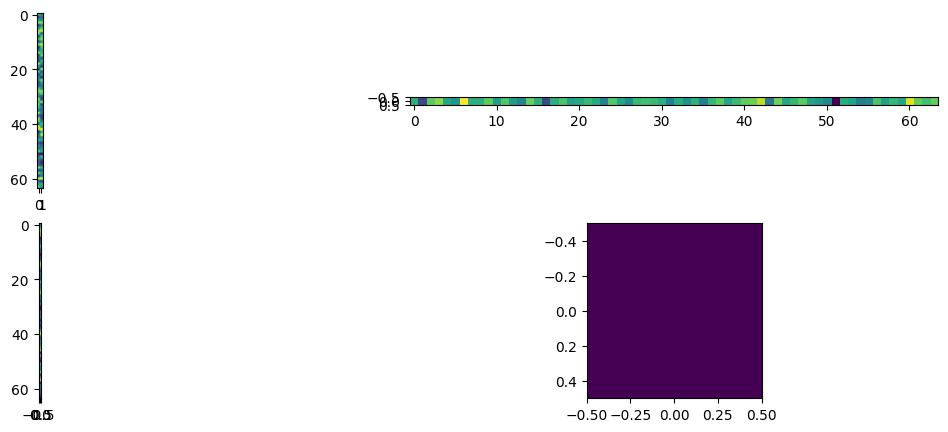

In [3]:
visualize_wandb(model)